In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy.linalg import toeplitz
import librosa
import seaborn as sns
from scipy.signal import freqz

## **Task (b): Implement LPC to Extract LPC Coefficients**

The Linear Predictive Coding (LPC) algorithm can be implemented using libraries like librosa, scipy, or numpy for speech signal processing. 

The core concept involves finding the LPC coefficients by minimizing the prediction error.

In [13]:
def manual_toeplitz(r):
    n = len(r)
    toeplitz_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            toeplitz_matrix[i, j] = r[abs(i - j)]
    return toeplitz_matrix

def lpc_analysis(signal, order):
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    R = autocorr[:order+1]

    toeplitz_matrix = manual_toeplitz(R[:-1])
    
    # Solve the Yule-Walker equations to get LPC coefficients
    a = np.linalg.solve(toeplitz_matrix, -R[1:])
    return np.concatenate([[1], a])  

In [14]:
signal, sr = librosa.load('input.wav', sr = None)
signal = lfilter([1, -0.97], [1], signal)

In [15]:
lpc_coeffs = lpc_analysis(signal, 10)
print(f'LPC coefficients: {lpc_coeffs}')

LPC coefficients: [ 1.          0.15723461  0.30422326 -0.49655364 -0.12011753 -0.44961597
  0.04920771  0.12145959  0.20234116 -0.01260236 -0.00167167]


## Task (c): Reconstruct the Speech Signal from LPC Coefficients and Plot


In [21]:
def reconstruct_signal(lpc_coeffs, signal,sr):
    estimated_signal = lfilter([1], lpc_coeffs, signal)
    return estimated_signal

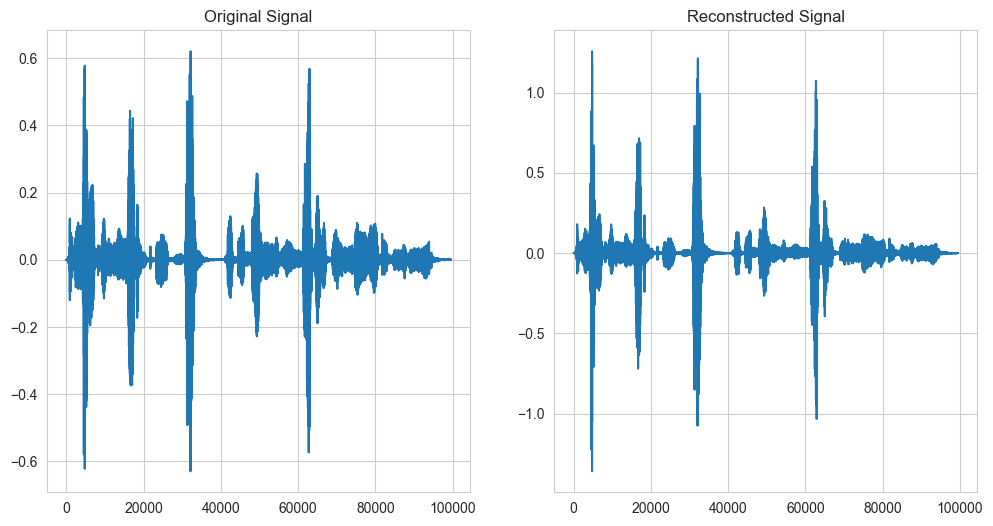

In [34]:
reconstructed_signal = reconstruct_signal(lpc_coeffs, signal, sr)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.title("Original Signal")
plt.subplot(1, 2, 2)
plt.plot(reconstructed_signal)
plt.title("Reconstructed Signal")
plt.show()

## **Task (d): Estimate the Formants from LPC Coefficients**

In [35]:
def estimate_formants(lpc_coeffs, sr):
    roots = np.roots(lpc_coeffs)
    roots = [r for  r in roots if np.imag(r) >= 0]
    angles = np.angle(roots)
    freqs = sorted (angles* (sr / (2*np.pi)))
    return freqs[:3]

formants = estimate_formants(lpc_coeffs, sr)
print(f'Estimated Formants: {formants}')

Estimated Formants: [0.0, 768.2548899138283, 4899.379720717332]


## **Task (e): Plot Formant Frequencies on Frequency Response Plot**

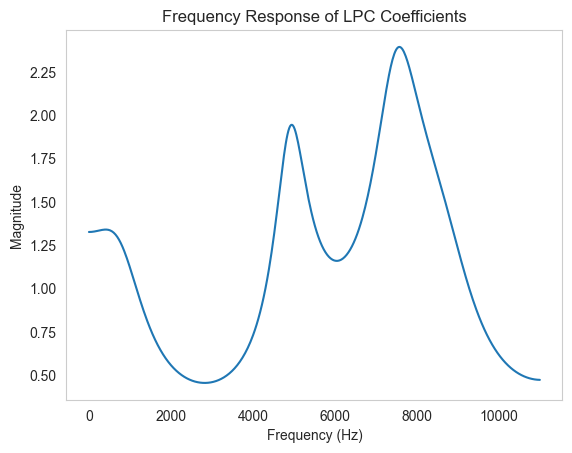

In [38]:

def plot_frequency_response(lpc_coeffs, sr):
    w, h = freqz(1, lpc_coeffs, worN=512)
    freqs = w * sr / (2 * np.pi)
    
    plt.plot(freqs, np.abs(h))
    plt.title("Frequency Response of LPC Coefficients")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

plot_frequency_response(lpc_coeffs, sr)